In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
health_data = os.path.join ('.' , 'Datasets' , 'age_and_sex_IP.csv')
health_data = pd.read_csv(health_data)
health_data.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [3]:
health_data_totals = health_data[health_data["Payer"]== "Total"]
health_data_totals.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832


In [4]:
health_data_totals = health_data_totals[health_data_totals["Service"]== "Total Personal Health Care"]
health_data_totals = health_data_totals[health_data_totals["Age Group"]== "Total"]
health_data_totals 

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1140,Total,Total Personal Health Care,Total,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Total,Total Personal Health Care,Total,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [9]:
health_data_sex = health_data_totals[health_data_totals["Sex"]!= "Total"]
health_data_sex.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1140,Total,Total Personal Health Care,Total,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Total,Total Personal Health Care,Total,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [11]:
reduced_health_data_sex = health_data_sex.loc[:,["Sex", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
reduced_health_data_sex

,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1140,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [13]:
sex_index = reduced_health_data_sex.set_index("Sex")
sex_index 

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Sex,,,,,,,,,,
Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [15]:
flip_sex_index = sex_index.T
flip_sex_index 

Sex,Males,Females
2002,587266,778215
2004,680026,902354
2006,783910,1022542
2008,872613,1134540
2010,965308,1215153
2012,1050368,1295834
2014,1136102,1390984
2016,1246245,1549313
2018,1354777,1664992
2020,1548394,1818581


In [17]:
flip_sex_index.keys()

Index(['Males', 'Females'], dtype='object', name='Sex')

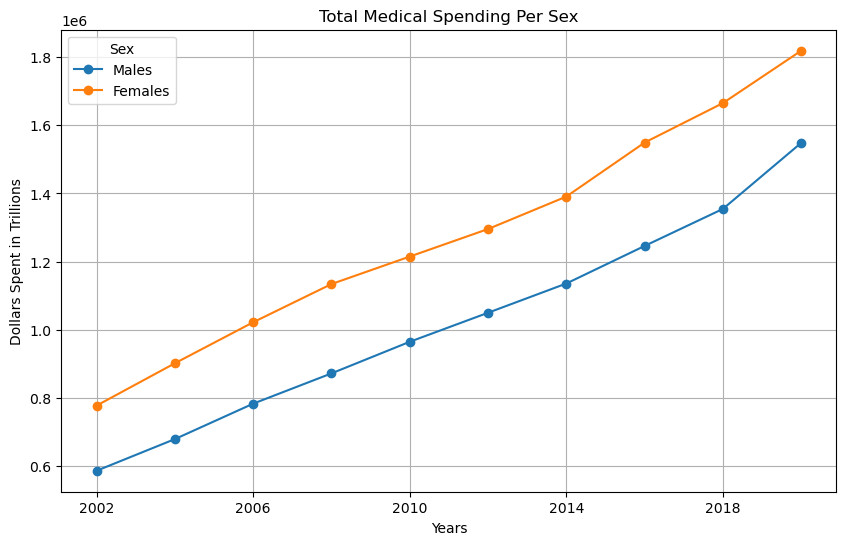

In [133]:
flip_sex_index.plot(kind='line', marker='o', figsize=(10,6))

plt.title("Total Medical Spending Per Sex")
plt.xlabel("Years")
plt.ylabel("Dollars Spent in Trillions")
plt.grid(True)
plt.show

plt.savefig("Figures\Total_Spending_Sex.png")

In [73]:
health_data_totals.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832


In [101]:
payer_totals = health_data[health_data["Payer"]== "Total"]
payer_totals.head() 

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
90,Total,Dental Services,Total,Total,73636,82189,91766,102762,105899,109700,114694,126197,137389,139313
91,Total,Dental Services,0-18,Total,19093,22843,25787,28007,28676,30925,30497,33178,33966,33643
92,Total,Dental Services,19-44,Total,20814,21996,22659,25224,24490,25225,26693,30148,32340,32316
93,Total,Dental Services,45-64,Total,23759,25209,28661,32575,33728,31366,32698,34524,37762,37152
94,Total,Dental Services,65-84,Total,9191,11051,13304,15016,17013,19993,22316,25779,30090,32832


In [97]:
service_totals = payer_totals[payer_totals["Service"]== "Total Personal Health Care"]
service_totals.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533


In [99]:
sex_totals = service_totals[service_totals["Sex"]== "Total"]
sex_totals.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533


In [107]:
totals_age_group = sex_totals[sex_totals["Age Group"] != "Total"]
totals_age_group

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
1139,Total,Total Personal Health Care,85+,Total,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [111]:
final_age_groups = totals_age_group.loc[:,["Age Group", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_age_groups

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1135,0-18,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,19-44,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,45-64,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,65-84,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
1139,85+,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [115]:
age_group = final_age_groups.set_index("Age Group")
age_group

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
19-44,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
45-64,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
65-84,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
85+,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [127]:
age_group_flip = age_group.T
age_group_flip

Age Group,0-18,19-44,45-64,65-84,85+
2002,178448,331965,382688,368617,103762
2004,202201,372438,464516,422462,120763
2006,232989,417377,549813,467308,138963
2008,250925,437974,627062,533554,157638
2010,270828,474803,683349,578098,173383
2012,287823,502438,734607,633981,187353
2014,288509,553743,815413,673445,195974
2016,297986,637259,904083,752617,203613
2018,308435,692849,948257,849605,220623
2020,324242,759960,1039838,1003533,239402


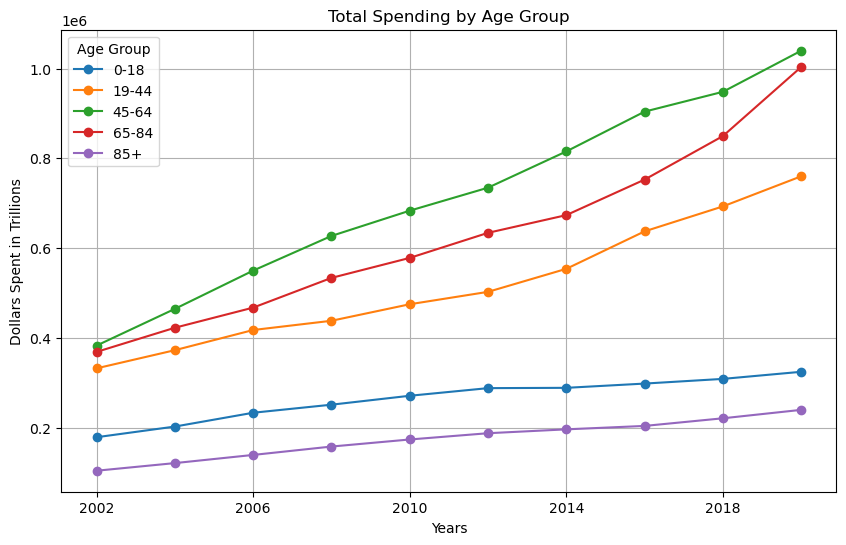

In [135]:
age_group_flip.plot(kind='line', marker='o', figsize=(10,6))

plt.title("Total Spending by Age Group")
plt.xlabel("Years")
plt.ylabel("Dollars Spent in Trillions")
plt.grid(True)
plt.show

plt.savefig("Figures\Total_Spending_Age.png")